In [5]:
library(ggplot2)

In [6]:
library(forecast )

In [7]:
library(fpp2)

# Average method


In [ ]:
meanf(y, h)
# y contains the time series
# h is the forecast horizon

# Naïve method


In [ ]:
naive(y, h)
rwf(y, h) # Equivalent alternative

# Seasonal naïve method


In [ ]:
snaive(y, h)

# Drift method


In [ ]:
rwf(y, h, drift=TRUE)


# Examples

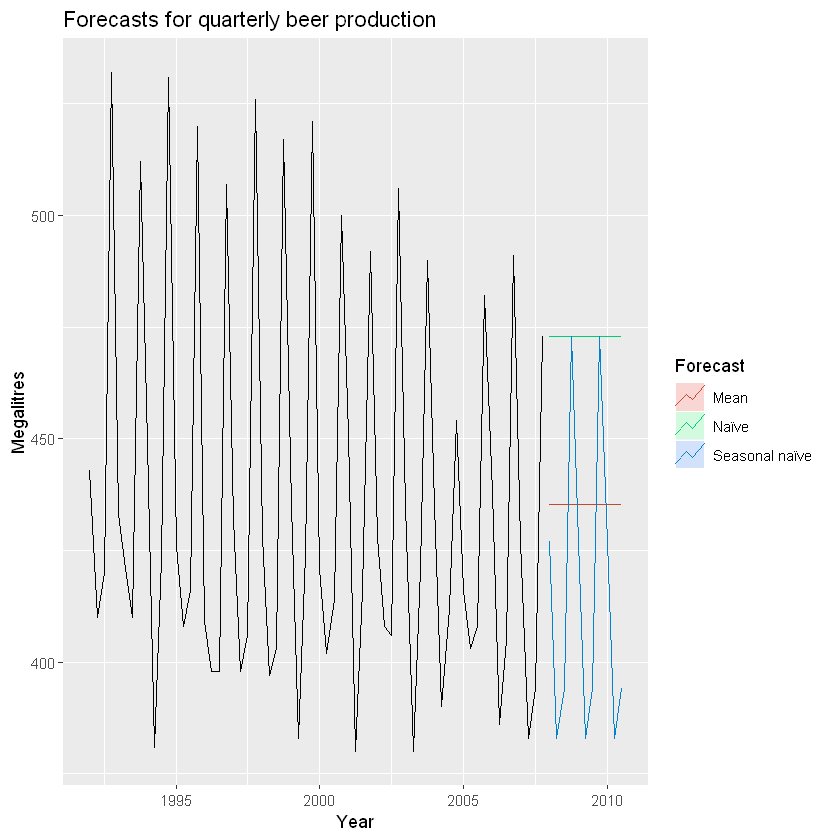

In [8]:
# Set training data from 1992 to 2007
beer2 <- window(ausbeer,start=1992,end=c(2007,4))
# Plot some forecasts
autoplot(beer2) +
  autolayer(meanf(beer2, h=11),
    series="Mean", PI=FALSE) +
  autolayer(naive(beer2, h=11),
    series="Naïve", PI=FALSE) +
  autolayer(snaive(beer2, h=11),
    series="Seasonal naïve", PI=FALSE) +
  ggtitle("Forecasts for quarterly beer production") +
  xlab("Year") + ylab("Megalitres") +
  guides(colour=guide_legend(title="Forecast"))

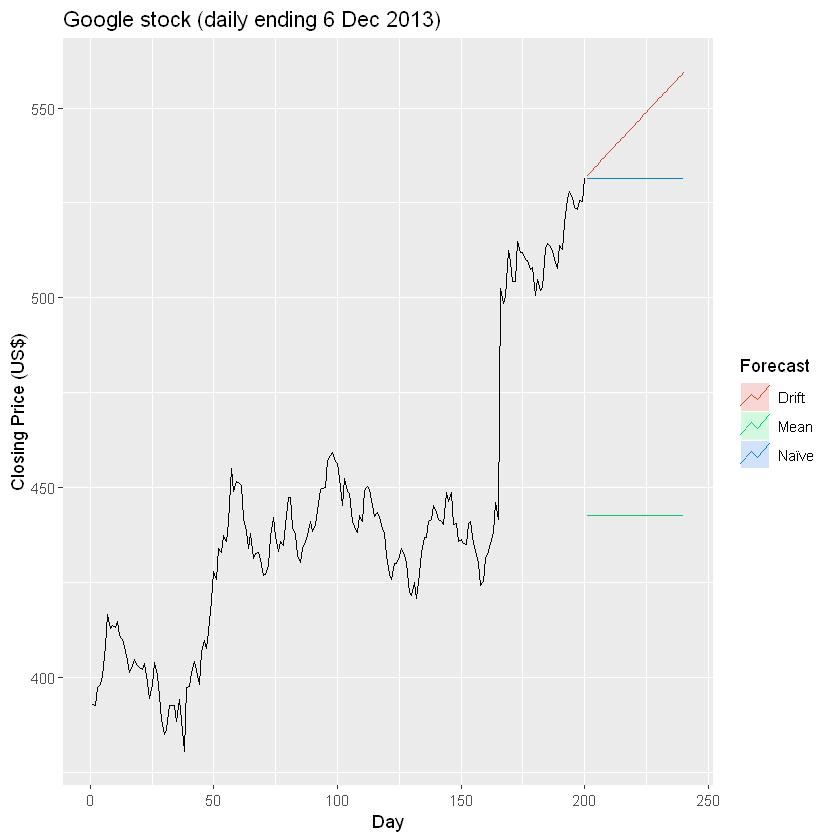

In [9]:
autoplot(goog200) +
  autolayer(meanf(goog200, h=40),
    series="Mean", PI=FALSE) +
  autolayer(rwf(goog200, h=40),
    series="Naïve", PI=FALSE) +
  autolayer(rwf(goog200, drift=TRUE, h=40),
    series="Drift", PI=FALSE) +
  ggtitle("Google stock (daily ending 6 Dec 2013)") +
  xlab("Day") + ylab("Closing Price (US$)") +
  guides(colour=guide_legend(title="Forecast"))

# 3.2 Transformations and adjustments


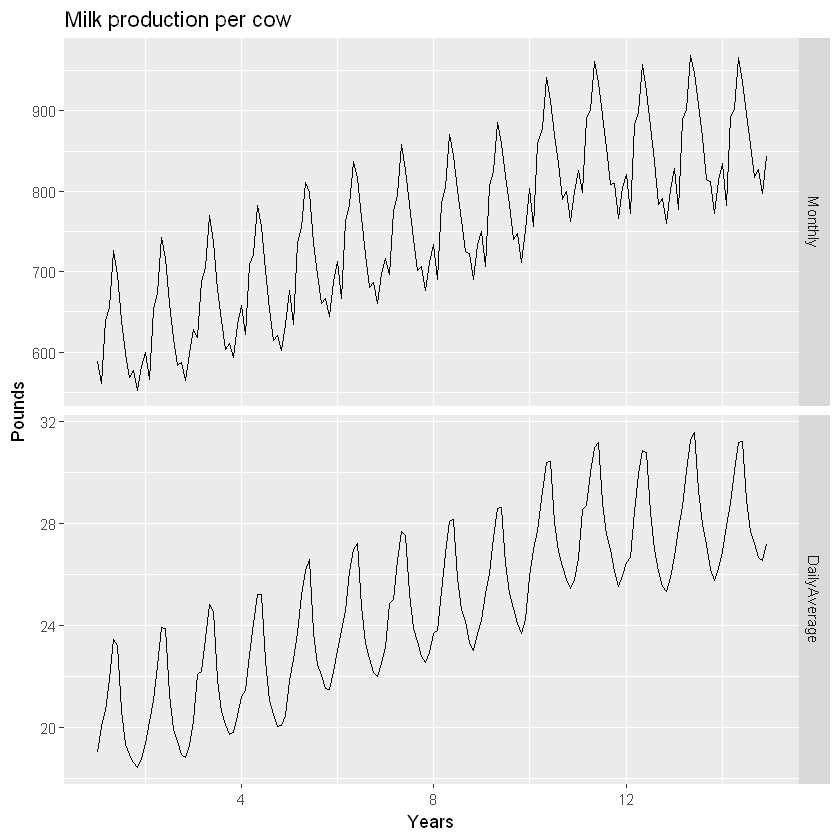

In [10]:
dframe <- cbind(Monthly = milk,
                DailyAverage = milk/monthdays(milk))
  autoplot(dframe, facet=TRUE) +
    xlab("Years") + ylab("Pounds") +
    ggtitle("Milk production per cow")

Notice how much simpler the seasonal pattern is in the average daily production plot compared to the average monthly production plot. By looking at the average daily production instead of the average monthly production, we effectively remove the variation due to the different month lengths. Simpler patterns are usually easier to model and lead to more accurate forecasts.



<strong> A similar adjustment can be done for sales data when the number of trading days in each month varies. In this case, the sales per trading day can be modelled instead of the total sales for each month. </strong>.


# Population adjustments


Any data that are affected by population changes can be adjusted to give per-capita data. That is, consider the data per person (or per thousand people, or per million people) rather than the total. For example, if you are studying the number of hospital beds in a particular region over time, the results are much easier to interpret if you remove the effects of population changes by considering the number of beds per thousand people. Then you can see whether there have been real increases in the number of beds, or whether the increases are due entirely to population increases. It is possible for the total number of beds to increase, but the number of beds per thousand people to decrease. This occurs when the population is increasing faster than the number of hospital beds. For most data that are affected by population changes, it is best to use per-capita data rather than the totals.

In [12]:
(lambda <- BoxCox.lambda(elec))

[1] 0.2654076

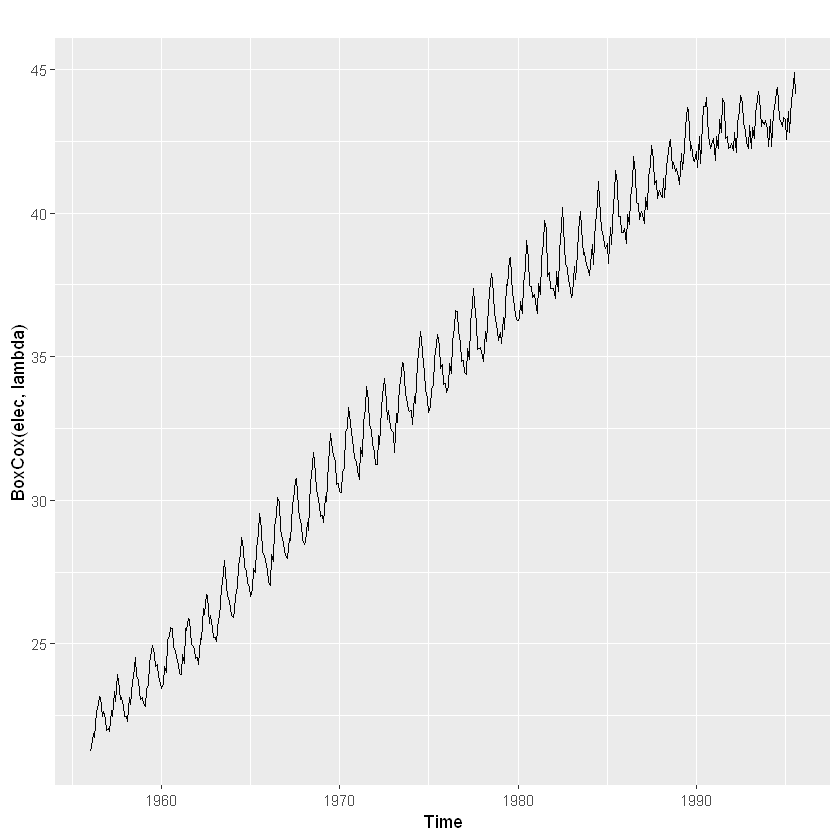

In [13]:
autoplot(BoxCox(elec,lambda))

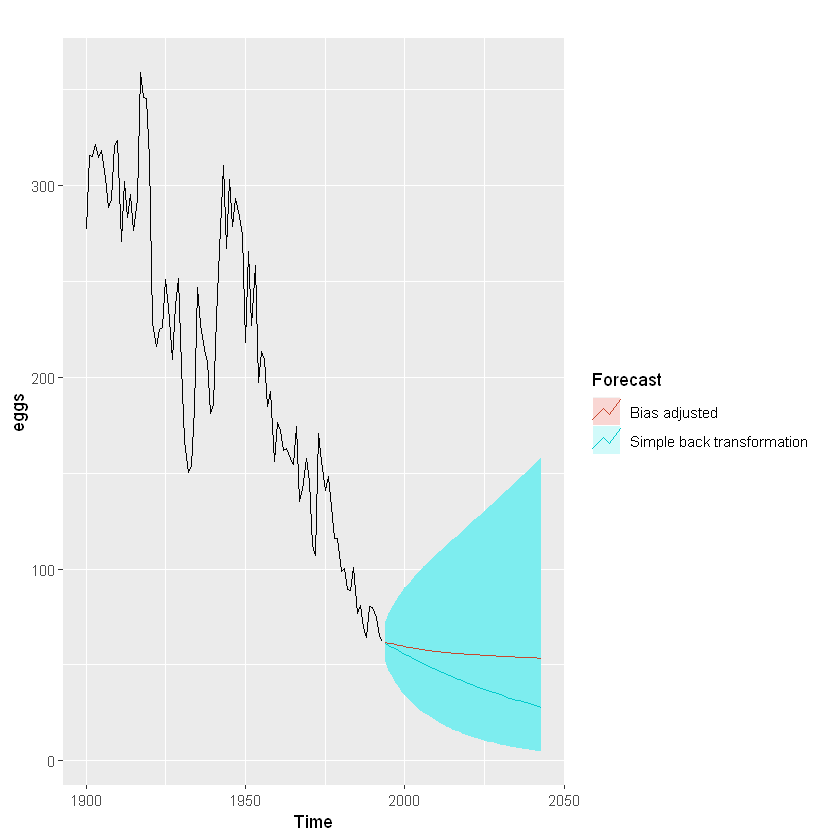

In [14]:
fc <- rwf(eggs, drift=TRUE, lambda=0, h=50, level=80)
fc2 <- rwf(eggs, drift=TRUE, lambda=0, h=50, level=80,
  biasadj=TRUE)
autoplot(eggs) +
  autolayer(fc, series="Simple back transformation") +
  autolayer(fc2, series="Bias adjusted", PI=FALSE) +
  guides(colour=guide_legend(title="Forecast"))

Bias adjustment is not done by default in the forecast package. If you want your forecasts to be means rather than medians, use the argument biasadj=TRUE when you select your Box-Cox transformation parameter.



# Residuals

The residuals are uncorrelated. If there are correlations between residuals, then there is information left in the residuals which should be used in computing forecasts.


The residuals have zero mean. If the residuals have a mean other than zero, then the forecasts are biased.m

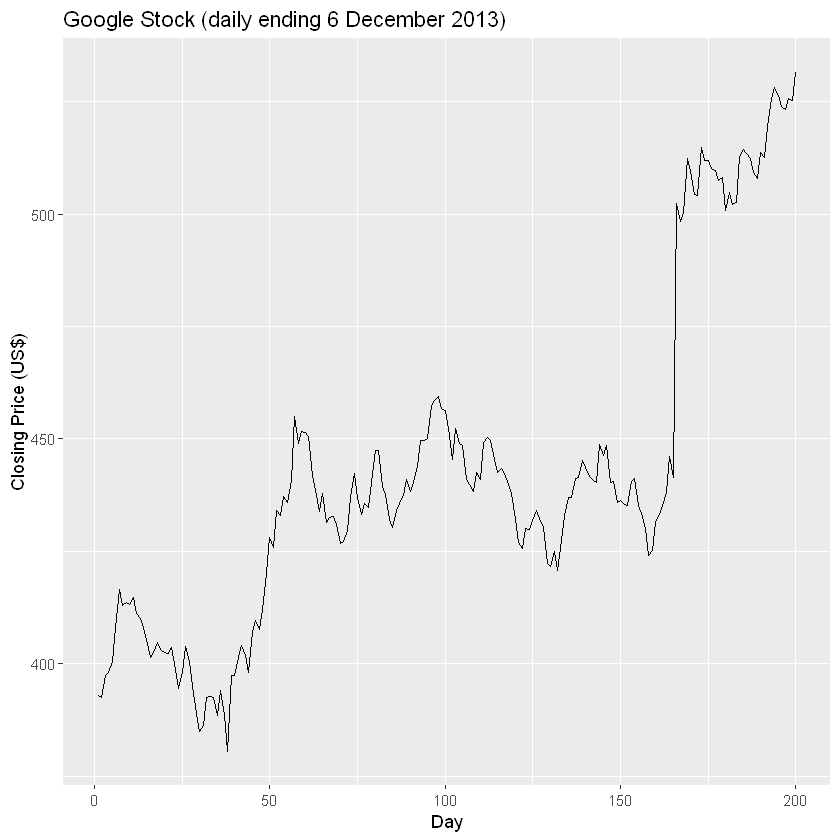

In [16]:
autoplot(goog200) +
  xlab("Day") + ylab("Closing Price (US$)") +
  ggtitle("Google Stock (daily ending 6 December 2013)")

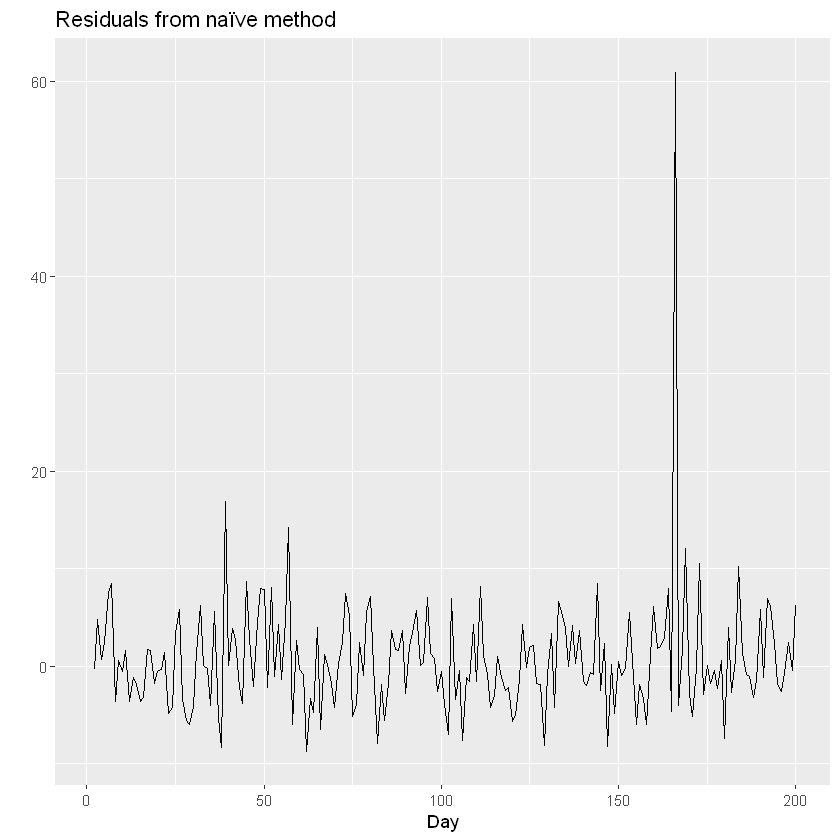

In [17]:
res <- residuals(naive(goog200))
autoplot(res) + xlab("Day") + ylab("") +
  ggtitle("Residuals from naïve method")

Warning message:
"Removed 1 rows containing non-finite values (stat_bin)."

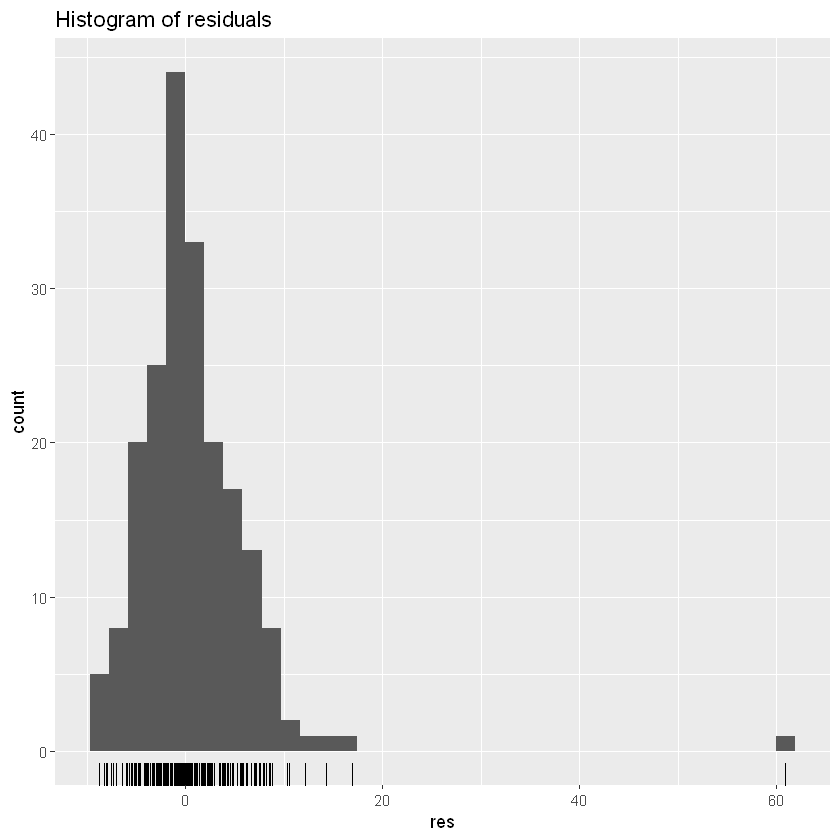

In [18]:
gghistogram(res) + ggtitle("Histogram of residuals")

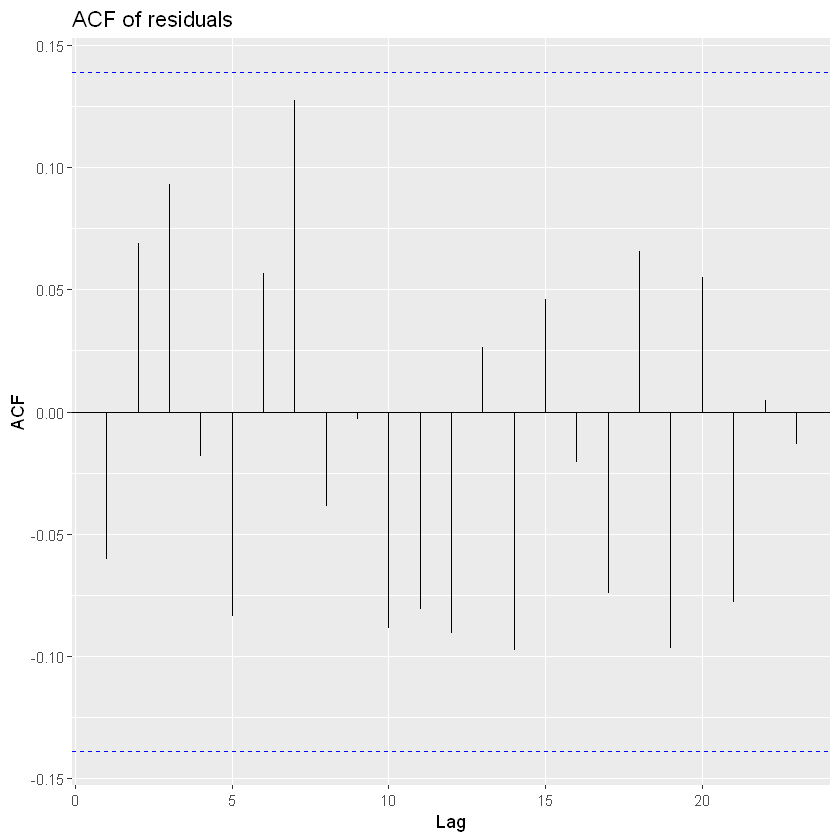

In [19]:
ggAcf(res) + ggtitle("ACF of residuals")

# Portmanteau tests for autocorrelation


We suggest using  
h
=
10
  for non-seasonal data and  
h
=
2
m
  for seasonal data, where  
m
  is the period of seasonality
  
  However, the test is not good when  
h
  is large, so if these values are larger than  
T
/
5
 , then use  
h
=
T
/
5

In [21]:
# lag=h and fitdf=K
Box.test(res, lag=10, fitdf=0)
#> 
#>  Box-Pierce test
#> 
#> data:  res
#> X-squared = 11, df = 10, p-value = 0.4

Box.test(res,lag=10, fitdf=0, type="Lj")
#> 
#>  Box-Ljung test
#> 
#> data:  res
#> X-squared = 11, df = 10, p-value = 0.4


	Box-Pierce test

data:  res
X-squared = 10.611, df = 10, p-value = 0.3886



	Box-Ljung test

data:  res
X-squared = 11.031, df = 10, p-value = 0.3551



	Ljung-Box test

data:  Residuals from Naive method
Q* = 11.031, df = 10, p-value = 0.3551

Model df: 0.   Total lags used: 10



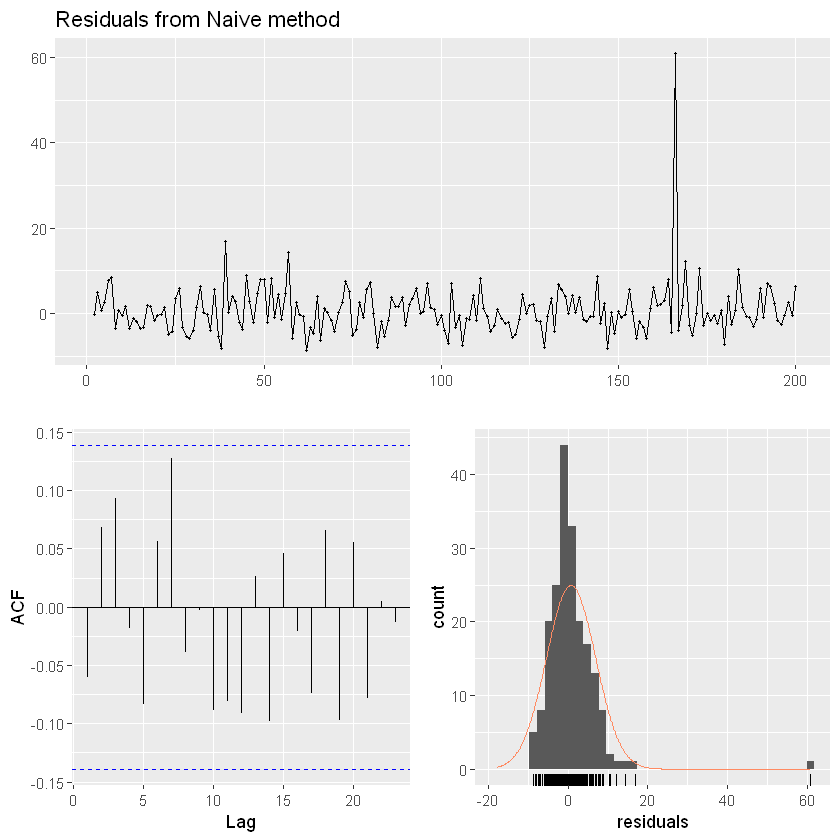

In [22]:
checkresiduals(naive(goog200))

# 3.4 Evaluating forecast accuracy
